In [1]:
#question 1:
#define the best sales channel for each client
#analysis of the best seller
#refinament of the group this customer belongs
#resegment of the client
#best time to contact the client
#optimation of the stock
#discover trends of new products
#probability of client's churn

In [2]:
#question 2:
#I have chosen the estimation of the probability of a client's churn as my study case. 
#With this information, the company will be able to act upon the clients with a higher probability of churn, 
#with this action the company will be able to reduce churn

In [3]:
#questions 3 and 4:

In [4]:
#anaconda version: 4.4.0
#python version: 3.6.1

#import of the libraries
import numpy as np
import pandas as pd
import sklearn
import matplotlib as plt
%matplotlib inline  

In [5]:
#read json file and save it in memory as 'data'
data = pd.read_json('challenge.json')

In [6]:
#print the firt lines of data
data.head()

#here we can have our first view of the dataset

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
0,0,143,0,0.0,854,292.91,21804,10,2017-11-10T00:00:00Z,0,0,190,1613.53,25.04
1,0,433,0,0.0,246,287.19,5486,20,2011-05-16T00:00:00Z,1,5,153,11163.69,12.33
2,0,486,0,0.0,1420,184.84,22662,12,2018-01-24T00:00:00Z,0,0,166,6432.12,12.80
3,0,107,0,0.0,1963,189.18,3956,18,2010-07-28T00:00:00Z,1,0,156,831.82,10.51
4,0,768,0,0.0,1786,66.87,4730,5,2010-12-17T00:00:00Z,1,0,218,1736.48,11.82


In [7]:
#print the shape of data
data.shape

#the dataset has 14 columns and 204428 rows

(204428, 14)

In [8]:
#print columns names
list(data)

#all the variables are numerical, but 'register_date'
#there's no string variable

['branch_id',
 'customer_code',
 'group_code',
 'is_churn',
 'item_code',
 'item_total_price',
 'order_id',
 'quantity',
 'register_date',
 'sales_channel',
 'segment_code',
 'seller_code',
 'total_price',
 'unit_price']

Explanation os the columns and categorization of the data:

item_code: id of this item
customer_code: unique id of a customer; -> ID
branch_id: the branch id where this order was made; -> categorical
sales_channel: the sales channel this order was made; -> categorical
seller_code: seller that made this order; -> ID
register_date: date of the order; -> date
total_price: total price of the order (sum of all items); -> numerical
order_id: id of this order; -> ID
quantity: quantity of items, given by item_code, were bought; -> numerical
item_total_price: total price of items, i.e., quantity* price; -> numerical
unit_price: unit price of this item; -> numerical
group_code: which group this customer belongs; -> categorical
segment_code: segment this client belongs; -> categorical
is_churn: if this client is set as a churn. -> categorical

In [9]:
#show basic statistics of the numerical variables
data.describe()

#missing cases in 'is_churn': 204428 - 202513 = 1915 cases

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,sales_channel,segment_code,seller_code,total_price,unit_price
count,204428.0,204428.000000,204428.000000,202513.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000,204428.000000
mean,0.0,447.489062,0.307184,0.191168,1437.298981,304.048244,12434.088863,12.332694,1.761182,0.846381,145.543022,5337.072931,47.456664
std,0.0,246.678026,0.714639,0.393222,903.166319,1009.268287,6935.623011,53.299314,2.929541,1.615763,75.197609,21268.855032,145.295694
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,0.010000
25%,0.0,221.000000,0.000000,0.000000,631.000000,79.600000,6497.750000,3.000000,0.000000,0.000000,83.000000,1180.470000,14.670000
50%,0.0,486.000000,0.000000,0.000000,1455.000000,156.150000,12698.000000,6.000000,0.000000,0.000000,156.000000,2035.820000,21.780000
75%,0.0,651.000000,0.000000,0.000000,2048.000000,293.862500,18280.000000,12.000000,2.000000,2.000000,195.000000,3611.070000,46.720000
max,0.0,837.000000,3.000000,1.000000,2980.000000,102951.110000,24617.000000,7000.000000,105.000000,7.000000,289.000000,428976.460000,26280.000000


In [10]:
#check if the non-numerical variable has missing
data['register_date'].isnull().sum(axis=0)

#no missing!

0

In [11]:
data['branch_id'].value_counts()
#the variable 'branch_id' has only one value (0), so it is an useless variable for modeling!!

0    204428
Name: branch_id, dtype: int64

In [12]:
#check if the others variables have more then one value

In [13]:
data['sales_channel'].value_counts().head()

0    103960
1     47961
6     25960
7     11355
2      6068
Name: sales_channel, dtype: int64

In [14]:
data['group_code'].value_counts()

0    170164
2     24703
1      7646
3      1915
Name: group_code, dtype: int64

In [15]:
data['segment_code'].value_counts()

0    150223
2     24703
5     10566
3      7824
4      4878
1      2303
6      2016
7      1915
Name: segment_code, dtype: int64

In [16]:
data['is_churn'].value_counts()

0.0    163799
1.0     38714
Name: is_churn, dtype: int64

In [17]:
data['seller_code'].value_counts().head()

190    10678
177    10021
171     7010
3       6776
27      5821
Name: seller_code, dtype: int64

In [18]:
data['customer_code'].value_counts().head()

633    8884
114    8879
658    6077
644    3296
763    1511
Name: customer_code, dtype: int64

In [19]:
data['order_id'].value_counts().head()

22012    138
17659     91
22248     87
19271     85
21985     83
Name: order_id, dtype: int64

In [20]:
data['item_code'].value_counts().head()

2630    7279
1767    6757
246     6748
282     5892
2624    5678
Name: item_code, dtype: int64

In [21]:
#now I'm trying to understand what’s the unique key of the dataset (as we can see in the above analysis, there isn’t any unique variable)
#my first guess for a unique key is 'order_id', so I'll analyze a case with more than one row

In [22]:
data[data['order_id']==22012]

#we can see that the variable that is unique in this case is 'item_code'

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price
108,0,413,2,0.0,709,37.88,22012,1,2017-11-23T00:00:00Z,6,2,230,3117.48,37.88
375,0,413,2,0.0,670,38.44,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,19.22
4581,0,413,2,0.0,570,30.99,22012,1,2017-11-23T00:00:00Z,6,2,230,3117.48,28.17
5712,0,413,2,0.0,2205,17.89,22012,1,2017-11-23T00:00:00Z,6,2,230,3117.48,17.89
5794,0,413,2,0.0,1980,2.98,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,1.49
7792,0,413,2,0.0,1027,24.36,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,12.18
9396,0,413,2,0.0,2180,10.34,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,5.17
9928,0,413,2,0.0,1804,36.84,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,18.42
13453,0,413,2,0.0,101,4.38,22012,1,2017-11-23T00:00:00Z,6,2,230,3117.48,4.38
13541,0,413,2,0.0,557,29.32,22012,2,2017-11-23T00:00:00Z,6,2,230,3117.48,14.66


In [23]:
#with the above insight, my guess is that the unique key of the dataset is a combination of 'order_id' and 'item_code'

#now I construct this variable and name it 'ID'
data['ID']=data['order_id'].astype(str) + '_' + data['item_code'].astype(str)

In [24]:
#analise 'ID' distribution
data['ID'].value_counts()

#we can see that it continues not being unique, but with few cases of duplicity

14560_1950    5
15469_934     5
15284_2014    4
14560_2344    4
15469_1866    4
14286_1882    3
17437_943     3
514_1951      3
2759_1947     3
12635_413     3
514_1911      3
1568_934      3
1568_1951     3
18058_2240    3
1568_1911     3
1568_433      3
24516_359     2
21170_2021    2
17437_2263    2
1568_2076     2
345_1871      2
1911_622      2
296_2394      2
9619_2035     2
2476_2847     2
17975_885     2
12318_556     2
17437_963     2
14560_2322    2
24071_667     2
             ..
15304_653     1
16496_795     1
20055_806     1
18655_1412    1
19735_1420    1
18104_2803    1
4098_1767     1
9759_854      1
10403_973     1
21960_1786    1
16963_1412    1
14242_360     1
2059_1785     1
16101_1151    1
21168_1599    1
7860_2627     1
11686_1993    1
24372_1407    1
5285_1786     1
2899_767      1
15794_2848    1
12320_721     1
6995_806      1
13478_143     1
7058_2864     1
22479_2861    1
21255_283     1
1197_36       1
15586_551     1
22227_1785    1
Name: ID, Length: 204322

In [25]:
#I'm trying to understand the duplicate cases with one example
#all the information is the same, so with this limited information I cannot explain the reason for this duplicity
#with the help of an expert in the information, I would be able to better understand it and do a proper treatment
data[data['ID']=='14560_1950']

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,ID
3897,0,633,2,1.0,1950,0.85,14560,1,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950
58779,0,633,2,1.0,1950,0.85,14560,1,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950
87042,0,633,2,1.0,1950,0.85,14560,1,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950
156628,0,633,2,1.0,1950,1.70,14560,2,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950
202966,0,633,2,1.0,1950,0.85,14560,1,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950


In [26]:
#as explained above, I don't know the reason of this duplicity (maybe the dataset is missing some variables...)
#because of it, I'll go forward assuming that this duplication is an error
#so I will remove all the duplications of a given 'ID', just keeping the first row
#I'll also drop the cases of nan in the variables 'is_churn' because I don't know the reason for this nan (imputation of info is not a good approach)
data_np=data.drop_duplicates(subset='ID', keep='first')
data_np=data_np.dropna()

In [27]:
#now all 'ID's are uniques
data_np[data_np['ID']=='14560_1950']

,branch_id,customer_code,group_code,is_churn,item_code,item_total_price,order_id,quantity,register_date,sales_channel,segment_code,seller_code,total_price,unit_price,ID
3897,0,633,2,1.0,1950,0.85,14560,1,2015-05-18T00:00:00Z,0,2,190,56.73,0.74,14560_1950


In [28]:
#my model is the probability of a client's churn, so my data should be aggregated in customer view
#for this, I have summarized the dataset in the 'customer_code' view, creating new variables:
#count: number of purchases made by the client
#is_churn: variables that show if the client is churn or not (target)
#item_total_price: the sum of all the items bought by the client
#group_code: a group of the client
#item_count: how many different items the client has bought 
#order_count: how many orders the client has made
#quantity: the total quantity of items bought so far
#channel_count: how many channels the client has used
#segment_code: the segment of the client
#seller_count: number of the different seller of the client

#more elaborated variables could be constructed, but for this case, I'll work just with these

data_np_agg = data_np.groupby('customer_code').agg({'customer_code': 'count', 'is_churn': 'max', 'item_total_price': 'sum',
                                                   'group_code':'max', 'item_code':'nunique',
                                                   'order_id': 'nunique', 'quantity':'sum','sales_channel':'nunique',
                                                   'segment_code':'max','seller_code':'nunique'})
data_np_agg = data_np_agg.rename(index=str, columns={"customer_code": "count", "item_code": "item_count", 
                                                     "order_id": "order_count","sales_channel":"channel_count",
                                                     "seller_code":"seller_count"})
data_np_agg.head()

,count,is_churn,item_total_price,group_code,item_count,order_count,quantity,channel_count,segment_code,seller_count
customer_code,,,,,,,,,,
0,179,0.0,84322.67,0,52,19,1666,4,0,2
1,471,0.0,90843.02,0,50,42,3217,2,0,1
2,307,0.0,97535.97,0,30,39,3204,3,0,2
3,635,0.0,383621.46,0,190,63,10124,5,0,2
4,301,0.0,104040.89,0,86,41,4383,4,0,1


In [29]:
#first analysis of the new dataset
data_np_agg.describe()

#there is no missing!!
#I have 818 cases (clients) for study

,count,is_churn,item_total_price,group_code,item_count,order_count,quantity,channel_count,segment_code,seller_count
count,818.000000,818.000000,8.180000e+02,818.000000,818.000000,818.000000,818.000000,818.000000,818.00000,818.000000
mean,247.457213,0.099022,7.535478e+04,0.040342,61.331296,29.804401,3058.180929,2.700489,0.46088,2.000000
std,525.389982,0.298874,5.028399e+05,0.246564,77.002036,111.213187,24340.762888,1.996208,1.36992,1.352273
min,3.000000,0.000000,3.290420e+03,0.000000,1.000000,1.000000,12.000000,1.000000,0.00000,1.000000
25%,83.250000,0.000000,1.877746e+04,0.000000,30.250000,10.000000,685.250000,1.000000,0.00000,1.000000
50%,155.000000,0.000000,3.612392e+04,0.000000,47.000000,19.000000,1335.000000,3.000000,0.00000,1.000000
75%,283.750000,0.000000,6.119419e+04,0.000000,72.000000,30.000000,2475.750000,3.000000,0.00000,3.000000
max,8866.000000,1.000000,1.413669e+07,2.000000,1349.000000,2676.000000,682533.000000,28.000000,6.00000,9.000000


In [30]:
#now I'm ready to stard modeling

In [31]:
#construction of the variables dataset
X=data_np_agg.drop(['is_churn'], axis=1)

In [32]:
#construction of the target dataset
y=data_np_agg['is_churn']

In [33]:
#split of the datasets in train (70%) and test (30%) datasets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [34]:
#I'll test two kind of models: Random Forest and Gradient Boosting

#Random forests are an ensemble method for classification that operate by constructing a multitude of decision trees
#each decision tree in the forest considers a random subset of features when forming questions and only has access to a 
#random set of the training data points
#to make a prediction, the random forest takes an average of all the individual decision tree estimates

#Boosting is an ensemble of weak learner (defined to be a classifier that is only slightly correlated with the true classification)
#it was the idea of filtering observations, leaving those observations that the weak learner can handle 
#and focusing on developing new weak learns to handle the remaining difficult observations

In [35]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(random_state = 0)

# Applying Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'max_depth': [2, 3, 4], 'n_estimators': [10, 30, 50], 'criterion': ['gini', 'entropy']}]
grid_search_rf = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_rf.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best parameters:', best_parameters)

best parameters: {'criterion': 'entropy', 'max_depth': 2, 'n_estimators': 30}


In [36]:
#in the above cases, I've tested 3 parameters:
#max_depth: max depth allowed in each tree
#n_estimators: number of tress
#criterion: convergence criterion

In [37]:
#aplication on the best parameters in a new model, using all the training dataset
clf_rf = RandomForestClassifier(criterion= 'entropy', max_depth= 2, n_estimators= 30, random_state=0)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [38]:
# Fitting Gradient Boosting Classification to the Training set
from sklearn.ensemble import GradientBoostingClassifier
classifier = GradientBoostingClassifier(random_state = 0)

# Applying Grid Search to find the best parameters
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [50, 100, 150], 'max_depth': [3, 4, 5]}]
grid_search_gb = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'roc_auc',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search_gb.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_

print('best parameters:', best_parameters)

best parameters: {'max_depth': 3, 'n_estimators': 150}


In [39]:
#in the above cases, I've tested 2 parameters:
#max_depth: max depth allowed in each tree
#n_estimators: number of tress

In [40]:
#aplication on the best parameters in a new model, using all the training dataset
clf_gb = RandomForestClassifier(max_depth= 3, n_estimators= 150, random_state=0)
clf_gb.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [41]:
#appling in the test dataset
y_pred_rf_b = clf_rf.predict(X_test)
y_pred_gb_b = clf_gb.predict(X_test)

In [42]:
#print accuracy of the models
from sklearn.metrics import accuracy_score
print('Accuracy Random Forest: ' , accuracy_score(y_test, y_pred_rf_b))
print('Accuracy Gradient Boosting: ' , accuracy_score(y_test, y_pred_gb_b))

#Gradient Boosting has the higher accuracy

Accuracy Random Forest:  0.930894308943
Accuracy Gradient Boosting:  0.943089430894


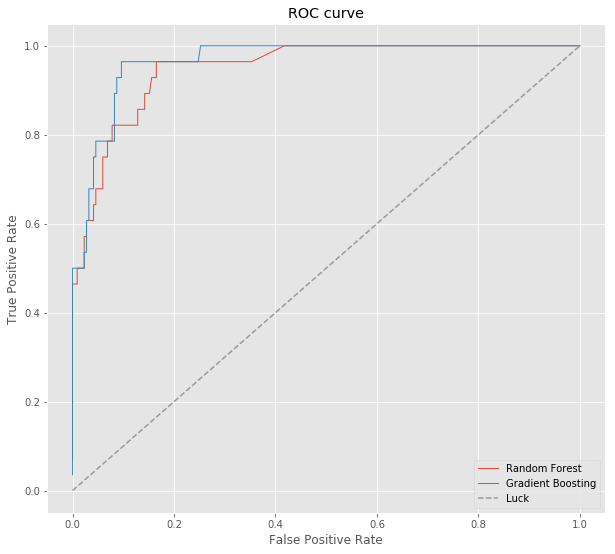

Gini Random Forest:  0.899246395806
Gini Gradient Boosting:  0.932011795544


In [43]:
#print gini of the models

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
y_pred_rf = clf_rf.predict_proba(X_test)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_rf[:,1])
roc_auc_rf = auc(fpr_rf, tpr_rf)
y_pred_gb = clf_gb.predict_proba(X_test)
fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_gb[:,1])
roc_auc_gb = auc(fpr_gb, tpr_gb)

plt.style.use('ggplot')
plt.figure(figsize=(10,9))
plt.title('ROC curve')
plt.plot(fpr_rf, tpr_rf, lw=1, label ='Random Forest')
plt.plot(fpr_gb, tpr_gb, lw=1, label ='Gradient Boosting')

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.legend(loc="lower right")
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

print('Gini Random Forest: ' , roc_auc_rf*2-1)
print('Gini Gradient Boosting: ' , roc_auc_gb*2-1)

#Gradient Boosting has the higher gini

In [44]:
#printing the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_b)
cm_gb = confusion_matrix(y_test, y_pred_gb_b)

print('Confusion Matrix Random Forest: ' , cm_rf)
print('Confusion Matrix Gradient Boosting: ' , cm_gb)

#Gradient Boosting has the best Confusion Matrix

Confusion Matrix Random Forest:  [[218   0]
 [ 17  11]]
Confusion Matrix Gradient Boosting:  [[218   0]
 [ 14  14]]


In [45]:
#in all the evaluation criterias Gradient Boosting has the winner!